# This is the logbook for OP37

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

## Measuring in the canonical basis

In [132]:
df = pd.read_csv("OP37_1.csv")
df

,Beta,Beta_HWP,Alpha,theta,V_t,"V_{t,max}",pr_t,V_r,"V_(r,max)",pr_r,pr_r+pr_t
0,44,44,0,-90,0.001,1.152,0.000868,1.116,1.11,1.005405,1.006273
1,54,44,10,-70,0.145,1.152,0.125868,0.963,1.11,0.867568,0.993436
2,64,44,20,-50,0.468,1.152,0.406250,0.651,1.11,0.586486,0.992736
3,74,44,30,-30,0.867,1.152,0.752604,0.273,1.11,0.245946,0.998550
4,84,44,40,-10,1.160,1.152,1.006944,0.010,1.11,0.009009,1.015953
5,94,44,50,10,1.150,1.152,0.998264,0.036,1.11,0.032432,1.030696
6,104,44,60,30,0.883,1.152,0.766493,0.257,1.11,0.231532,0.998025
7,114,44,70,50,0.524,1.152,0.454861,0.604,1.11,0.544144,0.999005
8,124,44,80,70,0.149,1.152,0.129340,0.965,1.11,0.869369,0.998710
9,134,44,90,90,0.001,1.152,0.000868,1.118,1.11,1.007207,1.008075


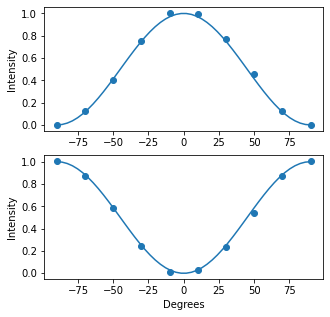

In [133]:
x = np.linspace(-90, 90, 50)
x2 = np.linspace(-90, 100, 50)
COS2 = (np.cos(x*(np.pi/180)))**2
SIN2 = (np.sin(x*(np.pi/180)))**2

#Plotting graphs
fig, (ax1, ax2) = plt.subplots(2, figsize=(5,5))
ax1.scatter(df["theta"], df["pr_t"], marker="o")
ax1.plot(x, COS2)
#ax1.set_title("H polarisation filter")

ax1.set_ylabel("Intensity")
ax2.scatter(df["theta"], df["pr_r"])
ax2.plot(x, SIN2)
#ax2.set_title("V polarisation filter")
ax2.set_ylabel("Intensity")
ax2.set_xlabel("Degrees")

plt.show()


## Measuring in the diagonal basis

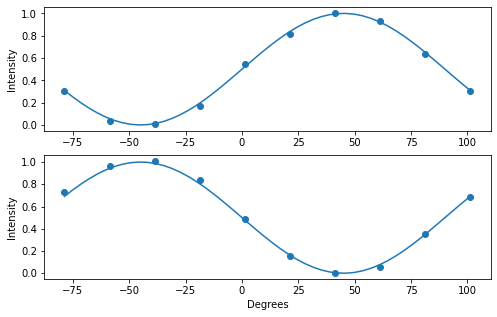

In [134]:
df2 = pd.read_csv("OP37_diag.csv")

x_diag = np.linspace(df2["theta"].min(), df2["theta"].max(), 50)
DIAG_H = 1/2*(1 + np.sin((2*x_diag*(np.pi/180))))
DIAG_V = 1/2*(1 - np.sin((2*x_diag*(np.pi/180))))
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,5))
ax1.scatter(df2["theta"], df2["pr_t"])
ax1.plot(x_diag, DIAG_H)


ax1.set_ylabel("Intensity")
ax2.scatter(df2["theta"], df2["pr_r"])
ax2.plot(x_diag, DIAG_V)

ax2.set_ylabel("Intensity")
ax2.set_xlabel("Degrees")

plt.show()


## Measuring in the circular basis

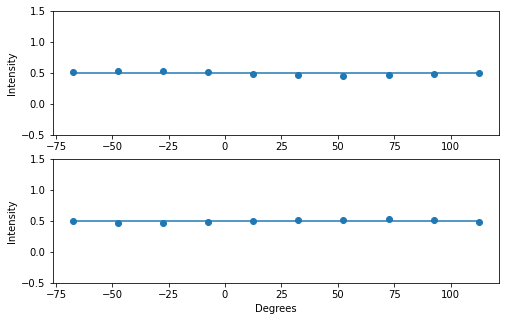

In [135]:
df3 = pd.read_csv("OP37_circ.csv")

x_circ = np.linspace(df3["theta"].min(), df3["theta"].max(), 50)
CIRC_H = np.ones(len(x_circ))*0.5
CIRC_V = np.ones(len(x_circ))*0.5
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,5))
ax1.scatter(df3["theta"], df3["pr_t"])
ax1.plot(x_circ, CIRC_H)
ax1.set_ylabel("Intensity")
ax1.set_ylim([-.5,1.5])


ax2.scatter(df3["theta"], df3["pr_r"])
ax2.plot(x_circ, CIRC_V)
ax2.set_ylabel("Intensity")
ax2.set_xlabel("Degrees")
ax2.set_ylim([-.5,1.5])

plt.show()


Zooming in closer, we see systematic faults, but they aren't too bad (about $\pm 10\%$)

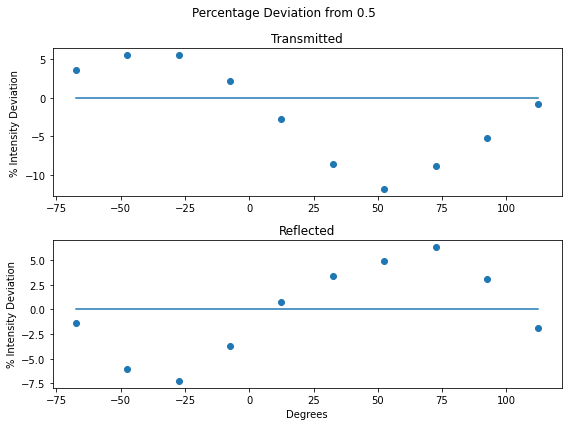

In [137]:
# df3 = pd.read_csv("OP37_circ.csv")

CIRC_H = np.zeros(len(x_circ))*0.5
CIRC_V = np.zeros(len(x_circ))*0.5
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6))
ax1.scatter(df3["theta"], (df3["pr_t"] - 0.5)/0.005)
ax1.plot(x_circ, CIRC_H)
ax1.set_ylabel("% Intensity Deviation")
ax1.set_title("Transmitted")


ax2.scatter(df3["theta"], (df3["pr_r"] - 0.5)/0.005)
ax2.plot(x_circ, CIRC_V)
ax2.set_ylabel("% Intensity Deviation")
ax2.set_xlabel("Degrees")
ax2.set_title("Reflected")

plt.suptitle("Percentage Deviation from 0.5")
plt.tight_layout()

plt.show()


## Calculating the arbitrary state (quantum tomography)

In [138]:
psi = np.array([0.071-0.921j, -0.213-0.317j])
R = np.array([1/np.sqrt(2), 1/np.sqrt(2)*1j])
L = np.array([1/np.sqrt(2), -1/np.sqrt(2)*1j])
Plus = np.array([1/np.sqrt(2), 1/np.sqrt(2)])
Minus = np.array([1/np.sqrt(2), -1/np.sqrt(2)])
H = np.array([1, 0])
V = np.array([0, 1])
Bases = {"H":H, "V":V, "Plus":Plus, "Minus":Minus, "R":R, "L":L}

In [139]:
for k,v in Bases.items():
    print("The component in the", k, "state is:")
    print(abs(v@psi)**2)

The component in the H state is:
0.853282
The component in the V state is:
0.14585800000000004
The component in the Plus state is:
0.7764040000000001
The component in the Minus state is:
0.22273599999999996
The component in the R state is:
0.7182499999999999
The component in the L state is:
0.2808899999999999


We can now check that $| {\psi'}\rangle$ can be reconstructed from $|\psi\rangle$.

In [140]:
psi_prime = np.array([0.932, 0.381*np.exp(1j*(-38.43*np.pi/180))])

In [141]:
import cmath
check = psi/psi_prime
print(cmath.polar(check[0]))
print(cmath.polar(check[1]))
_ , change_angle = cmath.polar(check[0])

(0.9911294477508839, -1.4938583777385346)
(1.0023979075989164, -1.4916999649053126)


In [142]:
psi_prime = psi_prime * np.exp(1j*change_angle)
check = psi/psi_prime
print(cmath.polar(check[0]))
print(cmath.polar(check[1]))
_, res_angle = cmath.polar(check[1])

(0.9911294477508837, -1.0485407871838361e-16)
(1.0023979075989164, 0.0021584128332219022)


so we see that these are equal up to a phase constant.

In [143]:
t = np.linspace(0, 2*np.pi, 50)
H = np.cos(t)*abs(psi[0])**2
V = np.sin(t)*abs(psi[1])**2

In [150]:
H_rectd = np.cos(t)*abs(psi_prime[0])**2
V_rectd = np.sin(t - res_angle)*abs(psi_prime[1])**2

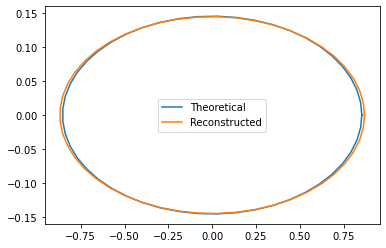

In [151]:
plt.plot(H, V, label = 'Theoretical')
plt.plot(H_rectd, V_rectd, label = "Reconstructed")
plt.legend()
plt.show()